In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('transaction_data.csv')

In [3]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
# Check null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [8]:
# Check statistics of numeric value columns
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


==> There are columns where the min value is negative: UserId, ItemCode, NumberOfItemsPurchased, CostPerItem

In [9]:
# UserId Column
df[df['UserId'] < 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
7,-1,6143225,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120,1.15,United Kingdom
13,-1,6058140,Mon Jul 02 07:33:00 IST 2018,435225,LUNCH BAG RED RETROSPOT,60,6.85,United Kingdom
17,-1,6288843,Sun Dec 30 12:58:00 IST 2018,489594,VINTAGE CHRISTMAS TABLECLOTH,3,34.45,United Kingdom
23,-1,6388019,Sat Feb 16 13:24:00 IST 2019,490329,ROLL WRAP VINTAGE CHRISTMAS,30,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083798,-1,6079524,Sun Jul 22 11:09:00 IST 2018,1787772,CHARLIE + LOLA BISCUITS TINS,3,11.45,United Kingdom
1083801,-1,6212338,Sun Nov 11 06:39:00 IST 2018,446166,RED RETROSPOT BIG BOWL,3,5.70,United Kingdom
1083804,-1,6272057,Wed Dec 19 11:09:00 IST 2018,458031,HANGING HEART WITH BELL,24,1.15,United Kingdom
1083810,-1,6106650,Sun Aug 12 11:53:00 IST 2018,446040,BLUE POLKADOT CUP,6,2.25,United Kingdom


In [17]:
# Check the appearance frequency of values in the UserId column
df.UserId.value_counts().reset_index().sort_values('UserId')

,UserId,count
0,-1,270160
4236,259266,4
525,259287,364
2559,259308,62
1481,259329,146
...,...,...
3774,383880,20
3938,383901,14
3550,383922,26
32,383943,1512


==> The value -1 is abnormal and can be eliminated

In [18]:
df = df[df['UserId'] > 0]

In [19]:
# ItemCode Column
df[df['ItemCode'] < 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
154,266301,5970085,Sat Apr 14 11:36:00 IST 2018,-1,POSTAGE,9,24.84,France
251,266028,5969843,Sat Apr 14 09:27:00 IST 2018,-1,POSTAGE,21,24.84,Germany
993,287574,6190756,Sun Oct 21 10:27:00 IST 2018,-1,Discount,-3,88.32,United Kingdom
1261,264243,6153851,Wed Sep 19 08:22:00 IST 2018,-1,POSTAGE,6,24.84,France
1773,268632,6026867,Sat Jun 09 07:36:00 IST 2018,-1,POSTAGE,6,38.64,Portugal
...,...,...,...,...,...,...,...,...
1082767,369663,6164785,Sat Sep 29 12:01:00 IST 2018,-1,Manual,-3,406.99,United Kingdom
1082835,305067,6349497,Wed Jan 30 08:06:00 IST 2019,-1,Discount,-3,23.13,United Kingdom
1083108,292299,6277326,Sun Dec 23 10:24:00 IST 2018,-1,POSTAGE,3,24.84,Denmark
1083581,260715,6035271,Wed Jun 13 10:28:00 IST 2018,-1,POSTAGE,3,483.00,Australia


In [20]:
df = df[df['ItemCode'] > 0]

In [21]:
# NumberOfItemsPurchased Column
df[df['NumberOfItemsPurchased'] < 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
69,300909,6015757,Tue May 29 14:14:00 IST 2018,466452,FOUR HOOK WHITE LOVEBIRDS,-3,2.90,United Kingdom
135,319683,6036228,Sat Jun 16 08:28:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,-24,17.60,United Kingdom
329,321531,5925150,Sat Feb 24 11:05:00 IST 2018,446418,VICTORIAN SEWING BOX LARGE,-3,15.12,United Kingdom
330,260715,6165940,Sun Sep 30 08:26:00 IST 2018,488061,TREASURE TIN GYMKHANA DESIGN,-3,2.88,Australia
353,274869,6004240,Sat May 19 09:35:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,-15,15.12,United Kingdom
...,...,...,...,...,...,...,...,...
1083558,302610,6169405,Tue Oct 02 09:00:00 IST 2018,475986,RECIPE BOX PANTRY YELLOW DESIGN,-3,4.08,United Kingdom
1083641,260715,6165940,Sun Sep 30 08:26:00 IST 2018,461454,SET OF 36 PAISLEY FLOWER DOILIES,-3,2.01,Australia
1083663,331485,6108982,Tue Aug 14 10:15:00 IST 2018,486255,KNICKERBOCKERGLORY MAGNET ASSORTED,-3,1.15,United Kingdom
1083719,315693,6146283,Fri Sep 14 07:54:00 IST 2018,448644,PEACE SMALL WOOD LETTERS,-3,9.32,United Kingdom


In [22]:
# Negative values can be multiplied by -1 to become positive values
df.loc[df['NumberOfItemsPurchased'] < 0, 'NumberOfItemsPurchased'] *= -1

In [23]:
# CostPerItem Column
df[df['CostPerItem'] < 0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country


Standardize the data type of the TransactimeTime column to datetime/date

In [24]:
input_format = '%a %b %d %H:%M:%S IST %Y'
# Convert string to datetime
df['TransactionTime'] = df['TransactionTime'].apply(lambda x: datetime.strptime(x, input_format))

In [25]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,2018-06-22 07:14:00,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,2019-01-11 09:50:00,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


In [26]:
# Create Month + Year columns based on TransactionTime column
df['Month'] = df['TransactionTime'].dt.month
df['Year'] = df['TransactionTime'].dt.year
# Convert TransactionTime to date
df['TransactionTime'] = df['TransactionTime'].dt.date

In [27]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Month,Year
0,278166,6355745,2019-02-02,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,2,2019
1,337701,6283376,2018-12-26,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,12,2018
2,267099,6385599,2019-02-15,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,2,2019
3,380478,6044973,2018-06-22,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,6,2018
5,285957,6307136,2019-01-11,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,1,2019


In [28]:
# Eliminate rows with abnormal TransactionTime (greater than current)
df = df[df['Year'] <= 2023]

Check the data distribution

NumberOfItemsPurchased


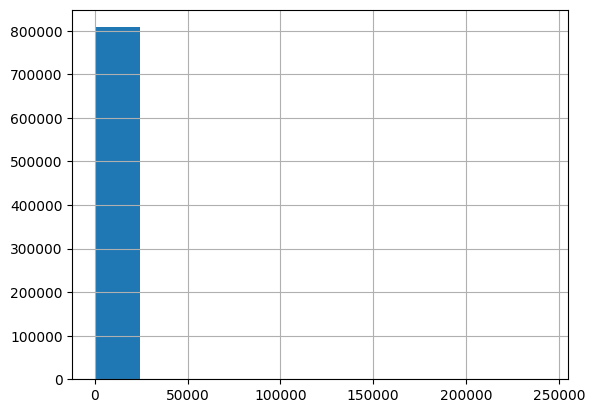

--------------------------------------------------
CostPerItem


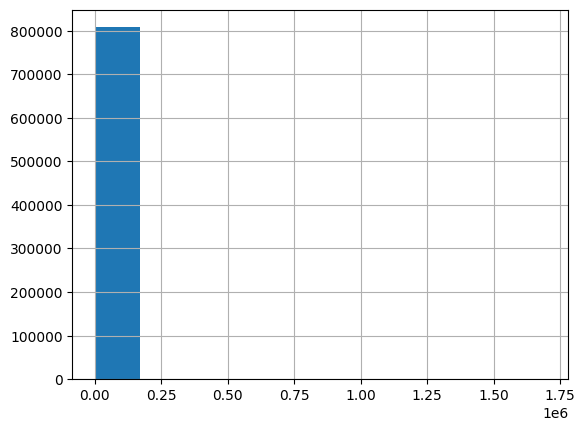

--------------------------------------------------


In [36]:
# Numeric values: NumberOfItemsPurchased, CostPerItem
for col in ['NumberOfItemsPurchased', 'CostPerItem']:
    print(col)
    df[col].hist(bins=10)
    plt.show()
    print('-' *50)

In [37]:
# Based on the distribution, we see that there are outlier values that need to be cut off. We can use quantile value 0.99 (99%)
for col in ['NumberOfItemsPurchased', 'CostPerItem']:
    # Calculate the 99% threshold value of the corresponding columns
    q99 = df[col].quantile(0.99)
    # Remove values greater than this threshold of 0.99
    df = df[df[col] <= q99]

NumberOfItemsPurchased


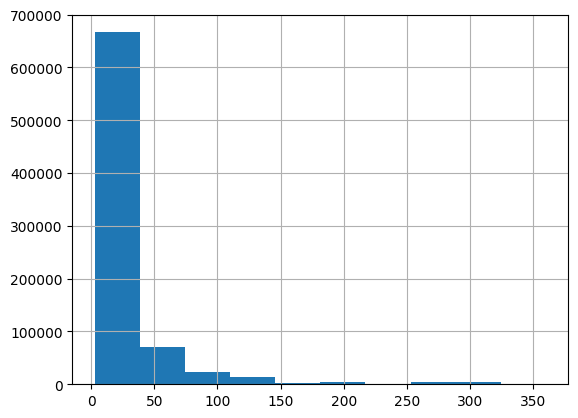

--------------------------------------------------
CostPerItem


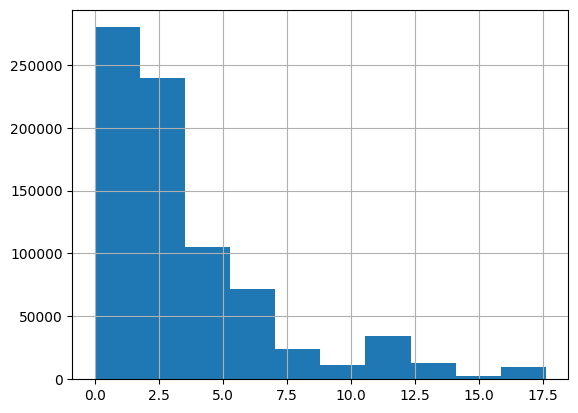

--------------------------------------------------


In [38]:
# Check the distribution of numeric values NumberOfItemsPurchased, CostPerItem after eliminating outliers by thresholding
for col in ['NumberOfItemsPurchased', 'CostPerItem']:
  print(col)
  df[col].hist(bins=10)
  plt.show()
  print('-'*50)